In [1]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## With additional array

1 task, 1 thread - measured parallel time : 5.75s, measured run time: 6.121 s

## 1. Parallelization with MPI ranks - weak scaling 

sbatch script Settings:

#SBATCH --nodes=1

#SBATCH --tasks=16

#SBATCH --cpus-per-task=1


threads=(1)

ranks=(1 4 9 16)



In [19]:
with open('team13_check222224_ranks_anqi.out', 'r') as f:
    data=f.read()

In [20]:
#segment the report into a list, each element is one run
seg_pattern = r'real.*\n.*\n.*\n.*\n'
all_performance = re.findall(seg_pattern, data)

In [21]:
print(all_performance[0])

real	0m5.952s
user	0m0.023s
sys	0m0.008s
Program completed with 1 ranks, 1 threads.



In [22]:
text = all_performance[0]
print(text)

real	0m5.952s
user	0m0.023s
sys	0m0.008s
Program completed with 1 ranks, 1 threads.



In [23]:
float(re.findall(r'ranks.*threads',text)[0][7:-8])

1.0

In [24]:
result_table=[]
for text in all_performance:
    result_dict ={}
    result_dict['time'] = float(re.findall(r'real.*\n',text)[0][7:-2])
    result_dict['number_of_ranks'] = float(re.findall(r'Program completed with.*ranks',text)[0][23:-6])
    result_dict['number_of_threads'] = float(re.findall(r'ranks.*threads',text)[0][7:-8])
    result_table.append(result_dict)

In [25]:
df_summary=pd.DataFrame(result_table)

In [26]:
df_summary

,time,number_of_ranks,number_of_threads
0,5.952,1.0,1.0
1,5.944,1.0,1.0
2,6.001,1.0,1.0
3,6.841,4.0,1.0
4,6.729,4.0,1.0
5,6.749,4.0,1.0
6,7.983,9.0,1.0
7,8.541,9.0,1.0
8,8.074,9.0,1.0
9,8.296,16.0,1.0


In [27]:
time1 = df_summary[df_summary['number_of_ranks'] == 1].time.mean()
df_summary['theoretical_Sp'] = df_summary['number_of_ranks']
df_summary['real_Sp'] = time1*df_summary['number_of_ranks']/df_summary['time']

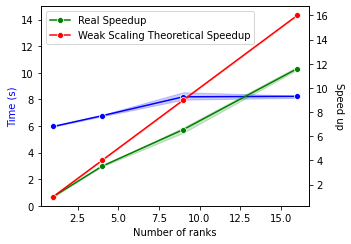

In [29]:
fig,ax0 = plt.subplots(figsize = (5,3.5))
ax1 = ax0.twinx()
sns.lineplot(data = df_summary, 
             x = 'number_of_ranks',
             y = 'time',
             marker = 'o',
             ax = ax0,
             color = 'blue')
ax0.set_xlabel('Number of ranks')
ax0.set_ylim(0,15)
ax0.set_ylabel('Time (s)', color = 'blue')

sns.lineplot(data = df_summary, 
             x = 'number_of_ranks',
             y = 'real_Sp',
             marker = 'o',
             ax = ax1,
             color = 'green',
             label = 'Real Speedup',)
sns.lineplot(data = df_summary, 
             x = 'number_of_ranks',
             y = 'theoretical_Sp',
             marker = 'o',
             ax = ax1,
             color = 'red',
             label = 'Weak Scaling Theoretical Speedup')
ax1.set_ylabel('Speed up', rotation = -90)
ax1.yaxis.set_label_coords(1.13, .5)

plt.tight_layout()
plt.savefig('weak_N100.png', dpi=300)

## 2. Parallelization with OpenMP threads - strong scaling 



sbatch script Settings:

#SBATCH --nodes=1

#SBATCH --tasks=1

#SBATCH --cpus-per-task=18

threads=(1 1 1 4 4 4 12 12 12 20 20 20 28 28 28 )

ranks=(1)

In [12]:
6.121/(6.121-5.75)

16.498652291105103

In [13]:
### Putting both OpenMP and MPI on the same graph

In [44]:
with open('team13_check222197_threads_anqi.out', 'r') as f:
    data=f.read()
    
#segment the report into a list, each element is one run
seg_pattern = r'real.*\n.*\n.*\n.*\n'
all_performance = re.findall(seg_pattern, data)

#Regex statistics
result_table=[]
for text in all_performance:
    result_dict ={}
    result_dict['time'] = float(re.findall(r'real.*\n',text)[0][7:-2])
    result_dict['number_of_ranks'] = float(re.findall(r'Program completed with.*ranks',text)[0][23:-6])
    result_dict['number_of_threads'] = float(re.findall(r'ranks.*threads',text)[0][7:-8])
    result_table.append(result_dict)
    
df_summary=pd.DataFrame(result_table)

# Calculate speedup
total = 6.121
parallel_portion = 5.75
sequential_portion = total - parallel_portion
f = sequential_portion/total
print(f)

time1 = df_summary[df_summary['number_of_threads'] == 1].time.mean()
df_summary['theoretical_Sp'] = 1/(f + (1-f)/df_summary['number_of_threads'])
df_summary['real_Sp'] = time1/df_summary['time']


0.06061101127266793


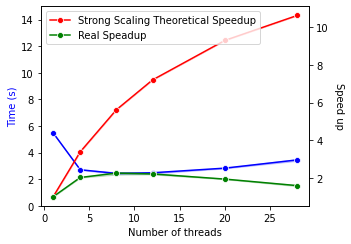

In [32]:
fig,ax0 = plt.subplots(figsize = (5,3.5))

ax1 = ax0.twinx()
sns.lineplot(data = df_summary, 
             x = 'number_of_threads',
             y = 'time',
             marker = 'o',
             ax = ax0,
             color = 'blue')
ax0.set_xlabel('Number of threads')
ax0.set_ylim(0,15)
ax0.set_ylabel('Time (s)', color = 'blue')

sns.lineplot(data = df_summary, 
             x = 'number_of_threads',
             y = 'theoretical_Sp',
             marker = 'o',
             ax = ax1,
             color = 'red',
             label = 'Strong Scaling Theoretical Speedup')


sns.lineplot(data = df_summary, 
             x = 'number_of_threads',
             y = 'real_Sp',
             marker = 'o',
             ax = ax1,
             color = 'green',
             label = 'Real Speadup'
             )

ax1.set_ylabel('Speed up', rotation = -90)
ax1.yaxis.set_label_coords(1.13, .5)

plt.tight_layout()
plt.savefig('strong_N100.png', dpi=300)

sbatch script Settings:

#SBATCH --nodes=1

#SBATCH --tasks=4

#SBATCH --cpus-per-task=7

threads=(1 1 1 3 3 3 5 5 5 7 7 7)

ranks=(1 4)

In [33]:
with open('team13_check222257_both_anqi.out', 'r') as f:
    data=f.read()

#segment the report into a list, each element is one run
seg_pattern = r'real.*\n.*\n.*\n.*\n'
all_performance = re.findall(seg_pattern, data)

#Regex statistics
result_table=[]
for text in all_performance:
    result_dict ={}
    result_dict['time'] = float(re.findall(r'real.*\n',text)[0][7:-2])
    result_dict['number_of_ranks'] = float(re.findall(r'Program completed with.*ranks',text)[0][23:-6])
    result_dict['number_of_threads'] = float(re.findall(r'ranks.*threads',text)[0][7:-8])
    result_table.append(result_dict)
    
df_summary=pd.DataFrame(result_table)

# Calculate speedup
#time1 = df_summary[df_summary['number_of_threads'] == 1].time.mean()
average_time1 = df_summary[df_summary['number_of_threads'] == 1].groupby(by = 'number_of_ranks').mean()[['time']]
average_time1.columns = ['average_time1']
df_summary = pd.merge(df_summary, average_time1, how = 'inner', on = 'number_of_ranks')

#df_summary['theoretical_Sp'] = df_summary['number_of_ranks']

df_summary['real_Sp'] = df_summary['average_time1']/df_summary['time']




In [36]:
df_summary.groupby(by = ['number_of_ranks', 'number_of_threads']).mean()

time  average_time1   real_Sp
number_of_ranks number_of_threads                                   
1.0             1.0                6.048333       6.048333  1.000052
                2.0                4.082667       6.048333  1.483552
                3.0                3.417000       6.048333  1.770556
4.0             1.0                7.010667       7.010667  1.000222
                2.0                5.067333       7.010667  1.383507
                3.0                3.863667       7.010667  1.826988
9.0             1.0                8.226000       8.226000  1.001943
                2.0                5.553333       8.226000  1.481305
                3.0                4.486667       8.226000  1.834366

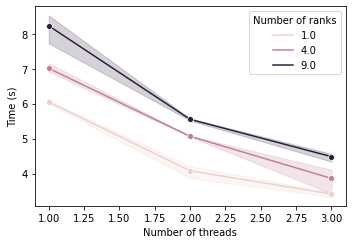

In [43]:
fig,ax0 = plt.subplots(figsize = (5,3.5))

# sns.lineplot(data = df_summary, 
#              x = 'number_of_threads',
#              y = 'real_Sp',
#              hue = 'number_of_ranks',
#              marker = 'o',
#              ax = ax0,
#              color = 'green')
sns.lineplot(data = df_summary, 
             x = 'number_of_threads',
             y = 'time',
             hue = 'number_of_ranks',
             marker = 'o',
             ax = ax0,
             color = 'blue')

ax0.set_ylabel('Time (s)')
ax0.set_xlabel('Number of threads')

plt.legend(title='Number of ranks')


plt.tight_layout()
plt.savefig('hybrid_N100.png')

## 3. Roofline calculation